In [19]:
import numpy as np
from util import *
from DG import DG, computing_DG_method_error
from Integral import *

In [20]:
interval = [0., 2.]
# interval = [-1., 1.]
N = 8
k = 3

In [21]:
def f(x):
    # return 1 + x + x**2 + x**3 + x**4
    return np.exp(x)

fh, I = DG(f, interval, N, k, 100)
print(I)

[[0.0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1.0], [1.0, 1.25], [1.25, 1.5], [1.5, 1.75], [1.75, 2.0]]


In [22]:
print(computing_DG_method_error(f, fh, I, N, 100))


3.9946141886425635e-06


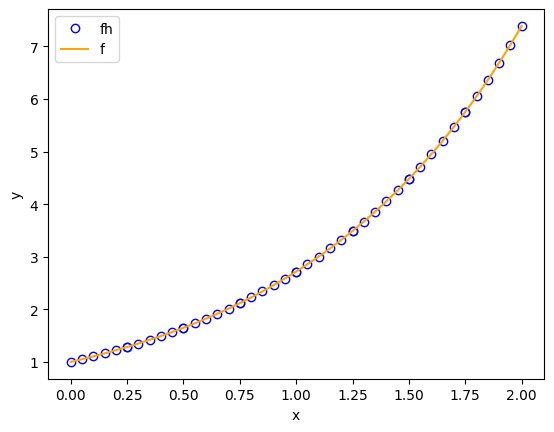

In [23]:
import matplotlib.pyplot as plt

for n in range(N):
    x = np.linspace(I[n][0], I[n][1], 50//N)
    plt.plot(x, fh(x,n), label='fh' if n == 0 else None, color='blue', linestyle='none', marker='o', markerfacecolor='none')
x = np.linspace(interval[0], interval[1], 100)
plt.plot(x, f(x), label='f', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [24]:
errors = []
k = 4
for i in range(6):
    N = 2**(i+1)
    fh, I = DG(f, interval, N, k, 100)
    errors.append(computing_DG_method_error(f, fh, I, N, 100))

print(errors)
for i in range(len(errors)-1):
    print(errors[i+1]/errors[i])

[np.float64(4.811469180726249e-05), np.float64(1.5841521170920768e-06), np.float64(5.017752859188665e-08), np.float64(1.5733952207127362e-09), np.float64(4.92105629735447e-11), np.float64(1.5381716002568862e-12)]
0.03292449889189487
0.03167469086491152
0.03135657065755014
0.031276669921021294
0.03125693971604832
